In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
tweets_data_path = 'E:\\Desktop2\\tweets.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet["text"])
    except:
        continue
print(len(tweets_data))


37266


In [3]:
tweets_data[0]

'RT @LizCrokin: Hillary Clinton is going to jail. That’s all. \n\n#QAnon #wwg1wga #thegreatawakening #greatawakening #pizzagate #Pedogate \nhtt…'

In [4]:
import io
file2write=open("E:\\Desktop2\\tweetonly.txt",'w',encoding="utf-8")
#file2write.write(str(tweets_data))
#file2write.close()
for i in range(len(tweets_data)):
    file2write.write(str(tweets_data[i]))
file2write.close()


In [5]:
import re

def clean_tweet(tweet):
   
   
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [6]:
c=[]
for i in range(len(tweets_data)):
    c.append(clean_tweet(tweets_data[i].lower()))
    

In [7]:
file3=open("E:\\Desktop2\\cleaned_tweets.csv",'w')
for i in range(len(c)):
    file3.write(str(c[i])+"\n")
file3.close()


In [8]:
import os
import codecs
from sklearn import feature_extraction
import mpld3
import nltk
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

In [9]:
stop_words = nltk.corpus.stopwords.words('english')
token=[]
for i in range(len(c)):
   word_tokens = word_tokenize(c[i])
   #filtered_sentence = [w for w in word_tokens if not w in stop_words]
   #print(word_tokens)
   token.append(word_tokens)
   #To tokenize each tweet
#print(token[0])
stop_words.append('rt')

In [44]:
filtered=[]
#print(len(token))
for i in range(len(token)):
    filtered_sentence = [w for w in token[i] if not w in stop_words]
    #final= [w for w in token_words if len(w)>3]

    filtered.append(filtered_sentence)
fin=[]
#print(shortword.sub('', text))
for i in range(len(filtered)):
    final= [w for w in filtered[i] if len(w)>3]
    fin.append(final)
#print(filtered[1])
print(fin[1])

['russia', 'listening', 'hope', 'able', 'find', 'emails', 'missing', 'going', 'prison', 'traito']


word2vec model


In [45]:
from gensim.models import Word2Vec
from gensim.models import word2vec

In [46]:
model = Word2Vec(fin, min_count=3,size=200,      # Dimensionality of word embeddings
                 workers=10,     # Number of processors (parallelisation)
                 window=6,      # Context window for words during training
                 iter=30)
print(model)

Word2Vec(vocab=4105, size=200, alpha=0.025)


In [48]:
words = list(model.wv.vocab)
print(words)
len(words)
#len('j')

['hillary', 'clinton', 'going', 'jail', 'qanon', 'wwg1wga', 'thegreatawakening', 'greatawakening', 'pizzagate', 'pedogate', 'russia', 'listening', 'hope', 'able', 'find', 'emails', 'missing', 'prison', 'traito', 'expecting', 'trump', 'tower', 'meeting', 'blocked', 'tweeted', 'democrats', 'colluded', 'russians', '2016', 'election', '2018', 'losses', 'pile', 'bernie', 'sanders', 'wing', 'democratic', 'party', 'evidence', 'whatsoever', 'donald', 'campaign', 'involved', 'kind', 'collusion', 'history', 'sure', 'bringing', 'flame', 'turns', 'happened', 'turned', 'phone', 'morning', 'first', 'thing', 'citing', 'story', 'identified', 'republican', 'districts', 'defeated', 'general', 'prime', 'media', 'bias', 'socialist', 'wins', 'consistently', 'attributed', '76yo', 'white', 'future', 'spent', 'nearly', 'days', 'president', 'property', 'golf', 'guys', 'watching', 'latest', 'insane', 'rigging', 'daily', 'ledger', 'really', 'people', 'indicted', 'pled', 'quilts', 'intelligence', 'says', 'stood',

4105

In [49]:
print(model['hillary'])


[-1.4846115  -0.11569929  0.6518158  -0.13768737  0.10218879  0.18522216
 -0.16839978  1.8630397   0.27840737 -1.2914933  -1.1025443   0.55772704
  0.12794256  0.19843599  0.44104517 -0.8942941   0.90515816  0.84065855
 -0.9792118  -0.7363054  -0.35740903  2.0689516   0.5821551  -0.24192116
 -0.00411858 -1.2539481  -1.3080227  -0.8266163   1.083204    1.020013
  2.4939842   0.20859419  1.5480034  -2.0217388   0.02930837 -0.08678748
  0.17514905 -0.6850234  -0.25083503  0.37104398  0.28081918  2.2137825
 -0.3946461   0.94302875  0.8454966   0.12459628  0.46824536  0.9642349
 -0.5231516  -1.480007    1.9406834  -0.4848509  -0.22111809  0.17450514
  0.6398433  -1.1264895   0.17245278 -0.9624126  -0.56946677  0.3943394
  1.8098083   0.45548362  0.21550268  1.3736788   1.3330935  -0.99911565
  0.8587483   1.4031632   0.402078    0.7056376  -0.68091434  0.6929391
  0.39945203  0.92569834 -0.01214364 -1.636673   -0.04238253  0.8603418
  0.35395053  0.34950677  0.26563182 -0.2850431  -0.371234

C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [51]:
model.save('model.bin')

In [53]:
new_model = Word2Vec.load('model.bin')
print(new_model)
X = model[model.wv.vocab]
model.most_similar('vedanta')


Word2Vec(vocab=4105, size=200, alpha=0.025)


C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
C:\Users\Manju\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('allows', 0.9735786318778992),
 ('unit', 0.9687964916229248),
 ('administrative', 0.9190912246704102),
 ('conditional', 0.9187192916870117),
 ('tuticorin', 0.9117879867553711),
 ('releasethirumurugan', 0.9007233381271362),
 ('sterliteshooting', 0.897903561592102),
 ('releasethirumurugangandhi', 0.8925325870513916),
 ('denies', 0.8906086087226868),
 ('section', 0.8839463591575623)]

In [70]:
import numpy as np
vec=[]
for word in words:
    vector = model[word]
    vec.append(vector)
#arr=np.array(vec)
print(vec)

C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



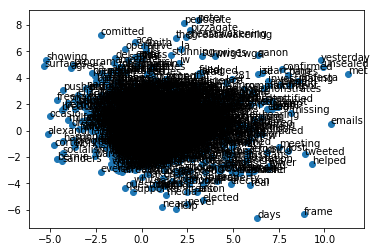

In [71]:
from sklearn.decomposition import PCA


# In[95]:


pca = PCA(n_components=2)
result = pca.fit_transform(X)


# In[105]:


plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [72]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 0, 1, 1, 1, 1, 4, 0, 4, 4, 1, 1, 0, 4, 0, 0, 4, 1, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 1, 1, 3, 2, 0, 1, 3, 3, 3, 1, 1, 1, 2, 2, 0, 2, 0, 3, 3, 3, 4, 4, 0, 0, 0, 4, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 4, 1, 4, 3, 3, 3, 0, 1, 1, 0, 1, 1, 0, 4, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 3, 3, 1, 3, 3, 1, 0, 2, 2, 2, 0, 2, 2, 2, 3, 2, 4, 2, 0, 4, 3, 4, 4, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 1, 3, 2, 3, 1, 1, 3, 2, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 2, 1, 4, 2, 3, 4, 1, 1, 4, 3, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 0, 3, 1, 1, 1, 4, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 4, 4, 4, 4, 1, 1, 2, 1, 1, 3, 4, 1, 1, 4, 1, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 

In [73]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

hillary:4
clinton:4
going:4
jail:4
qanon:4
wwg1wga:4
thegreatawakening:4
greatawakening:4
pizzagate:4
pedogate:3
htt:3
russia:0
listening:1
hope:1
able:1
find:1
30:4
000:0
emails:4
missing:4
prison:1
traito:1
jr:0
expecting:4
trump:0
tower:0
meeting:4
blocked:1
tweeted:4
amp:0
democrats:4
colluded:4
w:4
russians:0
fix:0
2016:0
election:0
sup:0
2018:2
losses:2
pile:2
bernie:2
sanders:2
wing:2
democratic:2
party:2
evidence:0
whatsoever:0
donald:0
campaign:0
involved:0
kind:0
collusion:0
history:2
fbi:4
way:1
sure:1
bringing:1
flame:3
turns:2
happened:0
sir:1
turned:3
phone:3
morning:3
first:1
thing:1
see:1
sen:2
citing:2
new:0
story:2
ht:0
identified:3
23:3
republican:3
districts:4
defeated:4
general:0
prime:0
media:0
bias:4
socialist:2
wins:2
consistently:2
attributed:2
76yo:2
white:0
man:1
future:2
spent:0
nearly:0
1:0
3:0
days:0
president:0
property:0
4:0
golf:0
p:0
guys:1
watching:1
latest:2
insane:1
rigging:0
got:1
daily:1
ledger:1
really:4
people:1
indicted:4
pled:3
quilts:3
intell

In [21]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[2 2 0 ... 0 0 0]
Centroids data
[[ 7.00014830e-02 -1.40926927e-01 -8.06278177e-03 -1.96218751e-02
   2.75694449e-02 -2.58631334e-02 -1.19371474e-01 -4.54376563e-02
   1.24779373e-01 -4.84018028e-02  1.16704419e-01  3.46349180e-03
  -3.19377240e-03  1.35683715e-02 -3.66001539e-02 -4.71888185e-02
   3.42091508e-02  5.22752181e-02  4.51373830e-02  1.41645838e-02
  -4.70466167e-03 -6.04728609e-02  6.23195097e-02 -6.65565729e-02
   1.29114091e-01 -9.80768353e-04 -4.02228646e-02 -9.68239456e-02
  -5.01967631e-02 -9.17924047e-02 -4.41948362e-02 -2.49273665e-02
  -1.32943243e-01  2.43792236e-02 -9.87713262e-02 -1.59122184e-01
   1.17539957e-01 -1.84140019e-02  2.24210396e-02 -1.07005984e-01
  -2.24616379e-02  1.57575812e-02  1.14417888e-01  4.68754992e-02
   9.72293690e-02  8.89752805e-02 -2.34289151e-02  6.95421174e-02
   3.20763141e-02 -2.19230540e-02 -3.16783972e-02 -9.33336914e-02
   3.18599194e-02  4.46271077e-02 -2.96044126e-02  4.55360226e-02
   9.35

C:\Users\Manju\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Silhouette_score: 
0.29961422


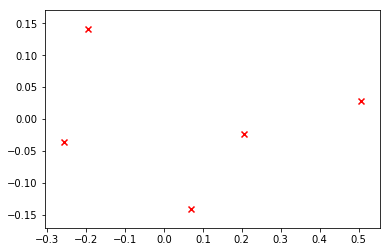

In [22]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]


In [51]:
order_centroids
center=[]
for i in range (0,5):
    center.append(model.most_similar([order_centroids[i]]))
center

C:\Users\Manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
C:\Users\Manju\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[[('Whitehouse', 0.18360602855682373),
  ('interview', 0.17920184135437012),
  ('admits', 0.17748671770095825),
  ('Corroborated', 0.173311248421669),
  ('Man', 0.17172281444072723),
  ('scale', 0.16743922233581543),
  ('Bye', 0.1657271534204483),
  ('midterms', 0.1655447632074356),
  ('Rudy', 0.16503837704658508),
  ('gallows', 0.16413171589374542)],
 [('second', 0.22100350260734558),
  ('sessions', 0.21021398901939392),
  ('Time', 0.20816142857074738),
  ('Old', 0.19881267845630646),
  ('u', 0.197812020778656),
  ('blame', 0.1970883011817932),
  ('Man', 0.1960357278585434),
  ('Cedar', 0.19598494470119476),
  ('Be', 0.19391538202762604),
  ('midterms', 0.1932099461555481)],
 [('Rudy', 0.21647992730140686),
  ('Arrest', 0.19566893577575684),
  ('Interesting', 0.19236640632152557),
  ('PA', 0.19125577807426453),
  ('Time', 0.1877225935459137),
  ('Corroborated', 0.18760797381401062),
  ('brought', 0.18712033331394196),
  ('ready', 0.18446923792362213),
  ('Blames', 0.18047590553760529)

In [56]:
c_words=[]
#center=[x for x in range(0,10) center[0][x][0]]
for x in range(10):
    for j in range(5):
        c_words.append(center[j][x][0])

In [57]:
c_words

['Whitehouse',
 'second',
 'Rudy',
 'Interesting',
 'interview',
 'interview',
 'sessions',
 'Arrest',
 'CONSPIRACY',
 'liar',
 'admits',
 'Time',
 'Interesting',
 'Man',
 'Last',
 'Corroborated',
 'Old',
 'PA',
 'ignores',
 'Hillary',
 'Man',
 'u',
 'Time',
 'fingering',
 'verbatim',
 'scale',
 'blame',
 'Corroborated',
 'Time',
 'guy',
 'Bye',
 'Man',
 'brought',
 'bitch',
 'Now',
 'midterms',
 'Cedar',
 'ready',
 'trying',
 'ready',
 'Rudy',
 'Be',
 'Blames',
 'ENTRAP',
 'Really',
 'gallows',
 'midterms',
 'Man',
 'WEEK',
 'Rudy']

In [78]:
f_doc=[]
#str1="AI is our friend and it has been friendly"
#str2="AI is our friend and always been friendly"
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    f=float(len(c)) / (len(a) + len(b) - len(c))
    #a=get_jaccard_sim(str1,str2)
    #print(f)
    if(f>0):
        f_doc.append(str2)
        
for i in range(len(c)):
    for j in range(len(c_words)):
        get_jaccard_sim(c_words[j],c[i])

In [79]:
f_doc

['RT Hillary Clinton is going to jail That s all QAnon wwg1wga thegreatawakening greatawakening pizzagate Pedogate htt',
 'RT Was Don Jr expecting Hillary Clinton emails in the Trump Tower meeting as who has now blocked me on he',
 'RT Trump just tweeted Hillary Clinton amp the Democrats colluded w the Russians to fix the 2016 election Can any Trump sup',
 'RT I ve identified 23 Republican districts in which Hillary Clinton defeated Donald Trump in the 2016 general election Prime',
 'Have you guys been watching Trump s latest INSANE screed about Hillary Clinton and Russia rigging the 2016 Election',
 'RT Hillary Clinton is going to jail That s all QAnon wwg1wga thegreatawakening greatawakening pizzagate Pedogate htt',
 'RT Hillary Clinton is going to jail That s all QAnon wwg1wga thegreatawakening greatawakening pizzagate Pedogate htt',
 'RT Is that all you got The Daily Ledger Really People have been indicted People have pled quilts Our Intelligence says',
 'RT 3 years ago the story w

In [80]:
len(f_doc)

15958